In [1]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

### Initialize the Quantum Register for how many qubits you need. 

#### Since the input source uses only one vaccum state $|0\rangle$ then we register only qubit

In [2]:
qreg =  QuantumRegister(1,"qreg")

### One Classical Register for one classical bit for measurement.

In [3]:
creg = ClassicalRegister(1,"creg")

## Now initialize Quantum Circuit using both quantum register and classical register.

In [4]:
qc = QuantumCircuit(qreg,creg)

#### Suppose initially we have |0> photon Fock state and it passes through a beam splitter which transforms the $|0\rangle$ $\rightarrow$ $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$.
#### In Qiskit we use the Hadamard gate for the transformation of $|0\rangle$. 

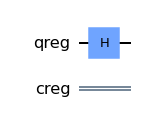

In [5]:
#first beam splitter transformation
qc.h(qreg[0])
display(qc.draw(output="mpl"))

* Now there is a phase rotator on one arm named $\phi$ = $0,\pi, \pi/2$
* Apply rotation gate $R_{y}$
* Describe which detector it will click after passing throught beam splitter 2

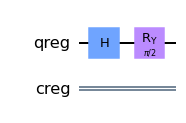

In [6]:
rotation = pi/2
qc.ry(rotation,qreg[0])
display(qc.draw(output="mpl"))

#### We have set the rotation angle.
* Now we pass the statevector $\psi$ through the second beam splitter using Hadamard gate

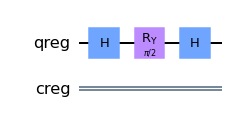

In [7]:
qc.h(qreg[0])
display(qc.draw(output="mpl"))

In [8]:
a = "Beeps on either detector 1 and detector 2 with equal probabilities"
    
b = "Beeps on detector 1"
    
c = "Beeps on detector 2"

#### Perform meaurement

* Now set the conditions i.e. which detector will click based on the rotation angle.

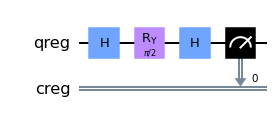

In [9]:
qc.measure(qreg,creg)
display(qc.draw(output="mpl"))

* Save the statevector and Print it in hard form

In [12]:
qc.save_statevector()
qobj = assemble(qc)
svsim = Aer.get_backend('aer_simulator')
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

### CASE 1: When $\phi = 0$

* It clicks the detector D1

In [13]:
if rotation==0:
    print(b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    
    print(counts)
    print()
    
    n_zeros = counts['0']
#    n_ones = counts3['1']
    print("State 0 is observed with frequency %",100*n_zeros/(n_zeros))
#    print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))
    print()

### CASE 2: When $\phi = \pi$

* It clicks the detector D2

In [14]:
if rotation==pi:
    print(c)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    
    print(counts)
    print()
    
#    n_zeros = counts3['0']
    n_ones = counts['1']
#    print("State 0 is observed with frequency %",100*n_zeros/(n_zeros))
    print("State 1 is observed with frequency %",100*n_ones/(n_ones))
    print()

### CASE 3: When $\phi = \frac{\pi}{2}$

* It either clicks the detector D1 or D2 with equal probabilties

In [15]:
if rotation==pi/2:
    print(a)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    
    print(counts)
    print()
    
    n_zeros = counts['0']
    n_ones = counts['1']
    print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
    print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))
    print()

Beeps on either detector 1 and detector 2 with equal probabilities
{'1': 526, '0': 474}

State 0 is observed with frequency % 47.4
State 1 is observed with frequency % 52.6



## Plot Probabilities on Histogram

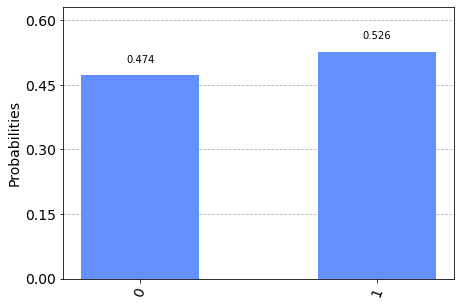

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)